Naive Bayes 분류기 활용 감정분석

내 풀이

In [10]:
text = [("I love you", "P"),
        ("love happy weekend", "P"),
        ("bore work job", "N"),
        ("I hate you", "N"),
        ("bore weekend", "N"),
        ("happy together", "P")]

In [2]:
#튜플-리스트-튜플 형변환 통해 긍부정 값 변경
for i in range(len(text)):
    text[i] = list(text[i])
    if text[i][1] == "P":
        text[i][1] = 0
    else:
        text[i][1] = 1
    text[i] = tuple(text[i])
text

[('I love you', 0),
 ('love happy weekend', 0),
 ('bore work job', 1),
 ('I hate you', 1),
 ('bore weekend', 1),
 ('happy together', 0)]

In [3]:
from collections import defaultdict
pos_cnt=0
neg_cnt=1

wordfreq = defaultdict(lambda : [0,0])
for doc, label in text:
    words = doc.split()
#     label =0 if label == "P" else 1 #라벨 바꿔주기
    
    for word in words:
        wordfreq[word][label] +=1
print(wordfreq)

for key, (cnt0,cnt1) in wordfreq.items():
    pos_cnt += cnt0
    neg_cnt += cnt1
print(pos_cnt)
print(neg_cnt)

defaultdict(<function <lambda> at 0x7fb458015040>, {'I': [1, 1], 'love': [2, 0], 'you': [1, 1], 'happy': [2, 0], 'weekend': [1, 1], 'bore': [0, 2], 'work': [0, 1], 'job': [0, 1], 'hate': [0, 1], 'together': [1, 0]})
8
9


In [4]:
#laplace smoothing
k=0.5
wordprob = defaultdict(lambda : [0,0])

for key, (cnt0,cnt1) in wordfreq.items():
    wordprob[key][0] = (k+cnt0) / (2*k + pos_cnt)
    wordprob[key][1] = (k+cnt1) / (2*k + neg_cnt)
wordprob

defaultdict(<function __main__.<lambda>()>,
            {'I': [0.16666666666666666, 0.15],
             'love': [0.2777777777777778, 0.05],
             'you': [0.16666666666666666, 0.15],
             'happy': [0.2777777777777778, 0.05],
             'weekend': [0.16666666666666666, 0.15],
             'bore': [0.05555555555555555, 0.25],
             'work': [0.05555555555555555, 0.15],
             'job': [0.05555555555555555, 0.15],
             'hate': [0.05555555555555555, 0.15],
             'together': [0.16666666666666666, 0.05]})

In [5]:
#log이용한 underflow 방지
doc = "happy weekend"
tokens = doc.split()

import math
log_prob0, log_prob1 = 0.0, 0.0

for word, (prob0,prob1) in wordprob.items():
    if word in tokens:
        log_prob0 += math.log(prob0)
        log_prob1 += math.log(prob1)

log_prob0 += math.log(pos_cnt / (pos_cnt + neg_cnt))
log_prob1 += math.log(neg_cnt / (pos_cnt + neg_cnt))

prob0 = math.exp(log_prob0)
prob1 = math.exp(log_prob1)

print(prob0)
print(prob1)

0.02178649237472767
0.003970588235294119


In [6]:
print("긍정확률{:.1f}%".format(prob0 / (prob0 + prob1) * 100))
print("부정확률{:.1f}%".format(prob1 / (prob0 + prob1) * 100))

긍정확률84.6%
부정확률15.4%


강사님 풀이(label 변환 부분 제외하고 동일)

In [11]:
'''P:0, N:1'''

from collections import defaultdict
pos_cnt=0
neg_cnt=1

wordfreq = defaultdict(lambda : [0,0])
for doc, label in text:
    words = doc.split()
    label =0 if label == "P" else 1 #라벨 바꿔주기
    
    for word in words:
        wordfreq[word][label] +=1
print(wordfreq)

for key, (cnt0,cnt1) in wordfreq.items():
    pos_cnt += cnt0
    neg_cnt += cnt1
print(pos_cnt)
print(neg_cnt)

defaultdict(<function <lambda> at 0x7fb49844dc10>, {'I': [1, 1], 'love': [2, 0], 'you': [1, 1], 'happy': [2, 0], 'weekend': [1, 1], 'bore': [0, 2], 'work': [0, 1], 'job': [0, 1], 'hate': [0, 1], 'together': [1, 0]})
8
9


In [12]:
#laplace smoothing
k=0.5
wordprob = defaultdict(lambda : [0,0])

for key, (cnt0,cnt1) in wordfreq.items():
    wordprob[key][0] = (k+cnt0) / (2*k + pos_cnt)
    wordprob[key][1] = (k+cnt1) / (2*k + neg_cnt)
wordprob

defaultdict(<function __main__.<lambda>()>,
            {'I': [0.16666666666666666, 0.15],
             'love': [0.2777777777777778, 0.05],
             'you': [0.16666666666666666, 0.15],
             'happy': [0.2777777777777778, 0.05],
             'weekend': [0.16666666666666666, 0.15],
             'bore': [0.05555555555555555, 0.25],
             'work': [0.05555555555555555, 0.15],
             'job': [0.05555555555555555, 0.15],
             'hate': [0.05555555555555555, 0.15],
             'together': [0.16666666666666666, 0.05]})

In [13]:
def get_prob(doc):
    tokens = doc.split()

    log_prob0, log_prob1 = 0.0, 0.0

    for word, (prob0,prob1) in wordprob.items():
        if word in tokens:
            log_prob0 += math.log(prob0)
            log_prob1 += math.log(prob1)

    log_prob0 += math.log(pos_cnt / (pos_cnt + neg_cnt))
    log_prob1 += math.log(neg_cnt / (pos_cnt + neg_cnt))

    prob0 = math.exp(log_prob0) #우도와 사전확률 계산한 결과(사후확률)
    prob1 = math.exp(log_prob1)
    
    return prob0,prob1

doc = 'happy weekend'
prob0, prob1 = get_prob(doc)

print(prob0)
print(prob1)

0.02178649237472767
0.003970588235294119


In [14]:
print("긍정확률{:.1f}%".format(prob0 / (prob0 + prob1) * 100))
print("부정확률{:.1f}%".format(prob1 / (prob0 + prob1) * 100))

긍정확률84.6%
부정확률15.4%


sklearn 활용한 나이브 베이지안

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [16]:
#doc과 label 분리 b/c 훈련시킬 때 문서만 넣어야 하므로
X_train = [t[0] for t in text]
y_train = [t[1] for t in text]

In [17]:
count_vect = CountVectorizer() #단어 개수 많을 때는 min,max_depth 사용
X_train_count = count_vect.fit_transform(X_train)

clf = MultinomialNB() #객체로 만들어줘야 함
clf.fit(X_train_count, y_train)

MultinomialNB()

In [18]:
#happy weekend를 검사
clf.predict(count_vect.transform(['happy weekend']))

array(['P'], dtype='<U1')

In [19]:
#예측력; 각 클래스에 대한 확률
#clf.predict가 P일 확률이 75%!
clf.predict_proba(count_vect.transform(['happy weekend']))

array([[0.25, 0.75]])

네이버영화 감성분석

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/e9t/nsmc/raw/master/ratings.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [21]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [22]:
df.head() #우리가 필요한건 document와 label

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [23]:
#train과 test 분리
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['document'], df['label'], shuffle=True, random_state=42)
y_train[:10] #0과 1 잘 섞여 있는지 확인(shuffle 잘 되었는지)

186420    0
42641     1
110059    0
66757     1
164593    0
56451     1
130924    0
26836     1
67863     1
145657    0
Name: label, dtype: int64

In [24]:
#모델에 훈련 시키기
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(X_train)
clf = MultinomialNB().fit(X_train_count,y_train)

In [25]:
X_test_count = count_vect.transform(X_test)
predicted = clf.predict(X_test_count)

#정확도 = 맞은 것 개수 / 전체 개수
np.mean(predicted == y_test) #y_test 개수 중 y랑 pred가 일치하는 것의 비율
#test set에 대해 83% 정도 예측력 가짐

0.8304132165286612

Tfidf 적용

In [26]:
#pipeline
#count_vect 결과를 tfidf가 받고 그 결과가 NB 입력으로 들어감
#마지막 y_train 라벨은 multinomial fit할 때 들어감
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect',CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf',TfidfTransformer()), 
                     ('clf', MultinomialNB(alpha=0.5))])
text_clf = text_clf.fit(X_train,y_train)

In [27]:
#text_clf는 sentence list를 입력 받았으니 predict도 sentence list 그대로 넣어주면 됨
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) #댓글은 짧아서 tfidf 성능이 크게 좋아지진 x

0.8350934037361495

In [28]:
#교차검증; 파라미터 여러가지 적용해보며 가장 좋은 param 찾도록!
#보통 gridsearch 보다는 randomsearch가 성능 더 좋음
from sklearn.model_selection import GridSearchCV

params_clf = {"vect__ngram_range":[(1,1),(1,2),(1,3)], #uni,bi,tri-gram
             "clf__alpha":(1, 0.5, 0.1, 0.001)}
gs_clf = GridSearchCV(text_clf, params_clf, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#교차검증 결과 어떤 파라미터가 가장 좋았는지 체크
best_parameters = gs_clf.best_estimator_.get_params()
for param_name in sorted(list(best_parameters.keys())):
    print("{} : {}".format(param_name, best_parameters[param_name]))

In [56]:
predicted = gs_clf.best_estimator_.predict(X_test)
np.mean(predicted == y_test)

0.8350934037361495

사전기반 감정분석_KNU 한국어 감성사전 활용 예제

In [66]:
#단어사전 만들기
dic = {}
with open("pos_pol_word.txt","r", encoding='utf-8') as f:
    dic['pos'] = f.read().split('\n')[19:] #각 라인이 하나의 단어로, 메타 데이터 삭제
    
with open("neg_pol_word.txt","r", encoding='utf-8') as f:
    dic['neg'] = f.read().split('\n')[19:]

In [67]:
print(dic['pos'][:10])
print("\n\n")
print(dic['neg'][:10])

['(-;', '(^^)', '(^-^)', '(^^*', '(^_^)', '(^o^)', '*^^*', '/^o^\\', ':(', ":'-("]



['가난', '가난뱅이', '가난살이', '가난살이하다', '가난설음', '가난에', '가난에 쪼들려서', '가난하게', '가난하고', '가난하고 어렵다']


In [64]:
txt = "코로나19의 여파로 전 세계 교사들과 학생들 모두 혼란스러운 시기를 보내고 있습니다. 초유의 상황에서도, 학생들을 위해 최선을 다하려는 선생님들의 노력이 계속되고 있는데요. 어려움 속에서, 선생님들은 어떤 방법으로 사랑을 전하고 있을까요? 뉴스G에서 전해드립니다. [리포트] 중국 저장성의 한 산골 마을. 초등학교 교사 왕진량 씨는 지난 2월 말부터, 매일 새벽 다섯 시면 부지런히 집을 나섭니다. 온라인 수업을 받을 수 없는, 깊은 산골 마을에 살고 있는 학생들을 찾아가기 위해서인데요. 선생님이 하루 동안 이동하는 거리는 대략 30km정도. 차도 없이 도보로 네 개의 마을을 돌아다니며 학생들을 만납니다. 매일 이어지는 강행군이지만, 오로지 아이들의 학습이 중단되어서는 안 된다는 생각뿐입니다. 혹시 모를 사태에 대비해 학생들과의 접촉은 최대한 줄입니다. 숙제를 내주고, 검사 후에 모르는 문제를 알려주는 식으로 일대일 수업을 진행하고 있는데요. 아이들에게 배우는 즐거움이 얼마나 소중한 것인지 잘 알기에, 선생님은 이렇게라도 수업을 할 수 있다는 데서 행복을 느낍니다. 영국의 한 초등학교 교사인 젠 포울스 씨는 매일 아침, 무거운 짐을 앞 뒤, 양 옆으로 짊어지고 씩씩하게 발걸음을 옮깁니다. 코로나19로 학교가 문을 닫은 뒤, 형편이 어려운 학생들을 위해 매일 78인분의 점심 도시락을 배달하고 있는데요. 선생님이 재직 중인 초등학교는 전체 학생의 41퍼센트가 무상 급식 대상자이기 때문입니다. 도시락의 무게는 18kg, 걸어야 하는 거리는 8km에 달하지만 기다리는 학생들을 생각하며 지치지 않고 발걸음을 재촉합니다. 학생들은 창문을 통해서 반갑게 인사하기도 하고, 선생님이 볼 수 있게 감사 메시지를 붙여 놓기도 하는데요. 선생님이 정성껏 준비해 손수 배달한 사랑의 도시락. 봉쇄된 도시의 굶주린 아이들에게 소중한 한 끼 식사, 그 이상의 의미가 되고 있습니다. 미국 사우스다코타 주의 중학교 수학 교사인 크리스 와바 씨는, 커다란 화이트보드를 들고 학생의 집을 찾았습니다. 온라인 수업 후, 학생에게 이메일로 방정식 풀이법에 대한 질문을 받았기 때문인데요. 이메일로 답변해주는 것보다 직접 풀이 과정을 보여주는 게 낫다는 생각이었죠. 깜짝 놀란 학생을 마주한 채, 선생님은 현관문 앞에서 열정적으로 문제를 풀기 시작했습니다. 이 열정적인 강의는, 학생이 풀이법을 완벽히 이해할 때까지 이어졌는데요. 바이러스는 전 세계 교실에 혼란을 불러왔지만, 선생님들의 노력은 저마다의 방식으로 계속되고 있습니다. 어려움 속에서도 학생들을 위해 안간힘을 쓰고 있는 모든 선생님들에게, 응원과 박수를 함께 보냅니다."

In [75]:
from konlpy.tag import Mecab
mecab = Mecab()

#전체 단어 돌면서 해당 단어가 pos인지 neg인지 확인
def analyze_sentiment(txt, dic):
    pos=[]
    neg=[]
    
    #word_list = mecab.morphs(txt)
    word_list = txt.split() #이게 mecab보다 성능 better
    
    for word in word_list:
        if word in dic['pos']:
            pos.append(word)
            
        if word in dic['neg']:
            neg.append(word)
        
    return (len(pos) / (len(pos) + len(neg)),pos), (len(neg) / (len(pos) + len(neg)),neg)

In [76]:
pos, neg = analyze_sentiment(txt,dic)
print(pos,neg)
#이 text의 경우 mecab 보다 split이 더 성능 좋음
#감정분석 결과 이 텍스트는 대체로 긍정적인 글

(0.6666666666666666, ['사랑을', '부지런히', '즐거움이', '소중한', '잘', '행복을', '씩씩하게', '감사', '정성껏', '사랑의', '소중한', '함께']) (0.3333333333333333, ['혼란스러운', '어려움', '모르는', '어려운', '굶주린', '어려움'])


차원축소

In [77]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [78]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [79]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [84]:
Y = df[['body_shape']]
Y.head()

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


In [85]:
#공분산 행렬 구하기 위해 feature들 정규화시킴
#공분산은 feature간 관계를 보는 거니까 피처 특성에 따른 영향력 차이 없애기 위해 정규화
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std #각 값을 정규화시킨 결과

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [86]:
#정규화한 결과 평균은 0
x_std.mean()

3.552713678800501e-17

In [87]:
#표준편차는 1로 변화
x_std.std()

1.0

In [88]:
import numpy as np

In [89]:
#feature를 행 방향으로 받으니까 transpose
features = x_std.T

#공분산행렬; 대각&대칭 행렬
covariance_matrix = np.cov(features)

covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [91]:
#공분산 행렬 구하는 또다른 방법
#자유도=n-1이므로 10-1해서 9로 나눠줘야 함
x_std.T.dot(x_std)/9

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [93]:
#고유값 분해
#공분산행렬의 eigen-value와 vector 구하기
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print("eig values \n", eig_vals)
print("eig vectors \n", eig_vecs)

eig values 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eig vectors 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [94]:
#0번째 주성분이 73% 정도의 정보량을 가지고 있는 것
eig_vals[0]/sum(eig_vals)

0.7318321731427544

In [102]:
#주성분 3개 가져오고 싶을 때; 거의 90% 정보량 보유
(eig_vals[0] + eig_vals[1] + eig_vals[2])/sum(eig_vals)

0.8965415116468556

In [95]:
#위에서 구한 eig_vec를 축으로 삼아 제1주성분 투영하기
projected_X = x_std.dot(eig_vecs.T[0]) #기존에 있는 데이터를 eig_vals 가장 큰 eig_vecs에 투영시키는 것
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [96]:
#5차원을 1차원으로 축소; PC1이라는 좌표축에 값 투영
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y_axis'] = 0.0
result['label'] = Y
result

,PC1,y_axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


In [98]:
!pip install matplotlib

In [99]:
!pip install seaborn

Text(0.5, 1.0, 'PCA result')

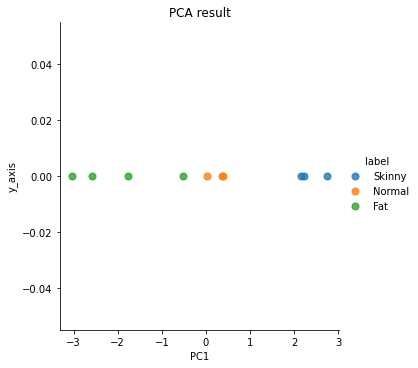

In [101]:
#5차원 데이터를 1차원에 투영
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('PC1','y_axis', data=result, fit_reg=False, scatter_kws={"s":50}, hue='label')
plt.title('PCA result')

간단한 방법

In [113]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1) #n_components; 몇차원으로 줄일 건지
pca_x = pca.fit_transform(x_std)
pca_x #부호 반대

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [114]:
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [4.0657343]
explained variance ratio : [0.73183217]


C:\Users\Yejin\.conda\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


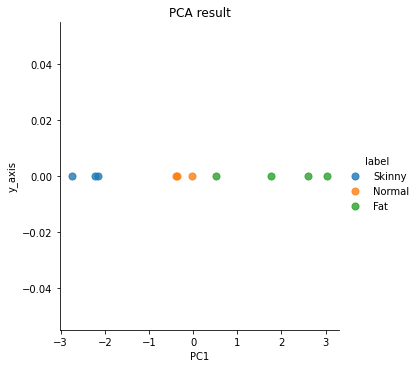

In [115]:
sklearn_result = pd.DataFrame(pca_x, columns=['PC1'])
sklearn_result['y_axis'] = 0.0 #1차원에 사영시키기 위함. seaborn은 2차원이므로 y를 임의의 값 0으로 줌
sklearn_result['label'] = Y

sns.lmplot('PC1','y_axis', data=sklearn_result, fit_reg=False, scatter_kws={"s":50}, hue='label')
plt.title('PCA result');

In [116]:
#2차원 축소
pca = decomposition.PCA(n_components=2)
pca_x2 = pca.fit_transform(x_std)
pca_x2

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

C:\Users\Yejin\.conda\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


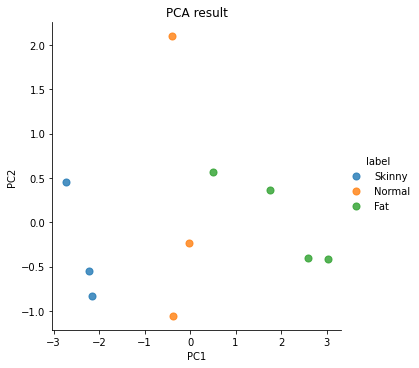

In [117]:
sklearn_result = pd.DataFrame(pca_x2, columns=['PC1','PC2'])
sklearn_result['label'] = Y

sns.lmplot('PC1','PC2', data=sklearn_result, fit_reg=False, scatter_kws={"s":50}, hue='label')
plt.title('PCA result');

In [118]:
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [4.0657343 0.8387565]
explained variance ratio : [0.73183217 0.15097617]


특이값 분해

In [119]:
A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]])

In [120]:
U, s, VT = np.linalg.svd(A)
print(U)
print(s) #특이값
print(VT)

[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
[3.         2.23606798 2.         0.        ]
[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


SVD_이미지 읽기

resolution : (1920, 1200)


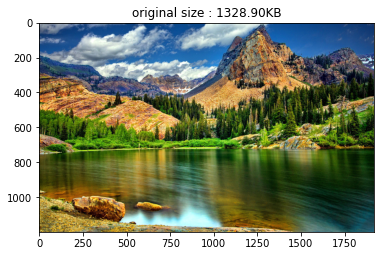

In [124]:
import os
from PIL import Image

path = 'nature-2-26-17.jpg'
img = Image.open(path)

s = float(os.path.getsize(path))/1000 #file의 size 알려줌
print("resolution :", img.size) #해상도
plt.title("original size : {:.2f}KB".format(s)) #파일 size(KB기준)
plt.imshow(img)

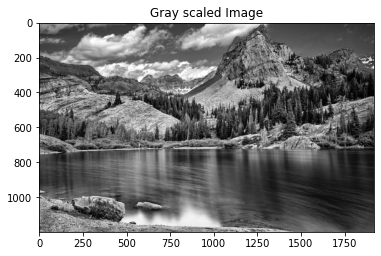

In [127]:
#흑백으로 바꾸기: 대략적인 것만 알고 있어도 됨!
imgray = img.convert("LA")
imgmat = np.array(list(imgray.getdata(band=0)), float)

imgmat.shape = (imgray.size[1], imgray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title("Gray scaled Image")
plt.show();

In [129]:
imgmat.shape

(1200, 1920)

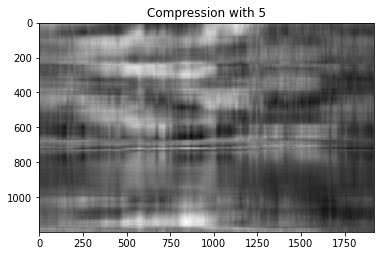

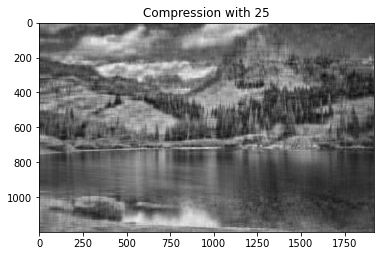

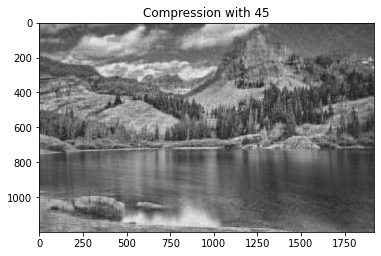

In [130]:
#이미지 압축
U, S, Vt = np.linalg.svd(imgmat)
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:,:i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap='gray')
    plt.title(f'Compression with {i}')
    plt.show();